In [2]:
using PyPlot,JLD2,MCMCDiagnostics
rc("font",family="serif")
include("CGS.jl")
include("MCMC.jl")
include("decompose_ttvs.jl")
include("plot_ttvs.jl")

plot_ttvs (generic function with 2 methods)

In [6]:
function plot_legend(include_moon::Bool=false)
    pair_ttvs = decompose_ttvs(nplanet,ntrans,pbest_global) .* (24 * 60)
    n1,n2,n3 = ntrans
    mu1,P1,t01,ecos1,esin1 = pbest_global[1:5]
    mu2,P2,t02,ecos2,esin2 = pbest_global[6:10]
    mu3,P3,t03,ecos3,esin3 = pbest_global[11:15]
    time1 = collect(t01 .+ range(0,stop=n1-1,length=n1) .* P1)
    time2 = collect(t02 .+ range(0,stop=n2-1,length=n2) .* P2)
    tt1 = tt[1:n1]
    tt2 = tt[n1+1:n1+n2]
    ttsim1 = (ttmodel[1:n1].-t01)./365.25 #in years
    ttsim2 = (ttmodel[n1+1:n1+n2].-t02)./365.25 
    ttv1 = (tt1.-time1).* (24 * 60) #in minutes
    ttv2 = (tt2.-time2).* (24 * 60) 
    sigtt1 = sigtt[1:n1].* (24 * 60)
    sigtt2 = sigtt[n1+1:n1+n2].* (24 * 60)
    
    fig = figure(figsize=(8,6))
#     subplot(211)
#     ax = gca() # Get the handle of the current axis
#     PyPlot.title("Venus TTVs and their sources")
#     ax.tick_params(direction="in")
#     p1 = plot(ttsim1,ttv1,linewidth=1.5,color="grey",label="Total")
#     p2 = plot(ttsim1,pair_ttvs[1,3,1:n1],linewidth=1.25,color="firebrick",label="Jupiter contribution")
#     p3 = plot(ttsim1,pair_ttvs[1,2,1:n1],linewidth=1.25,label="Earth contribution")
#     p4 = errorbar(ttsim1,ttv1,sigtt1,fmt=".",color="black")
#     legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.0)

#     ylabel("Venus TTVs [minutes]")
#     subplot(212)
#     PyPlot.title("Earth TTVs and their sources")
    tick_params(direction="in")
    ax2 = plot(ttsim2,ttv2,linewidth=1.5,color="grey",label="Total")
    p3 = plot(ttsim1,pair_ttvs[1,2,1:n1],linewidth=1.25,label="Earth contribution")
    ax3 = plot(ttsim2,pair_ttvs[2,3,1:n2],linewidth=1.25,color="firebrick",label="Jupiter contribution")
    ax4 = plot(ttsim2,pair_ttvs[2,1,1:n2],linewidth=1.25,color="orange",label="Venus contribution")
    if include_moon
        moon = moon_ttvs(ntrans,pbest_global) .* (24 * 60)
        plot(ttsim2,moon,linewidth=1.25,linestyle="--",color="purple",label="Moon contribution")
        ylabel("Earth TTVs [minutes]")
    else
        ylabel("EMB TTVs [minutes]")
    end
    errorbar(ttsim2,ttv2,sigtt2,fmt=".",color="black")
    legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.0)
    xlabel("Years Observed [N]")
    tight_layout()
end

plot_legend (generic function with 2 methods)

In [ ]:
@load ("mcmc_mtry3results.jld2")
@load ("OUTPUTS/moon_fitmtry3params.jld2")
plot_legend(true)

### Plot of simulated years observed vs TTVs

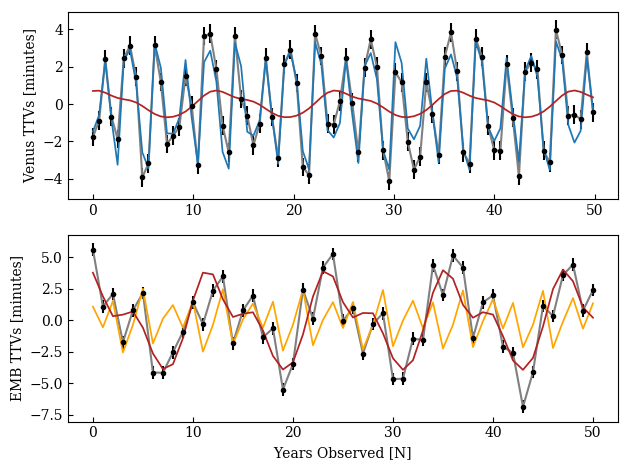

In [35]:
@load("OUTPUTS/p3_fittestparams.jld2")
@load("mcmc_testingresults.jld2")
plot_ttvs(false)

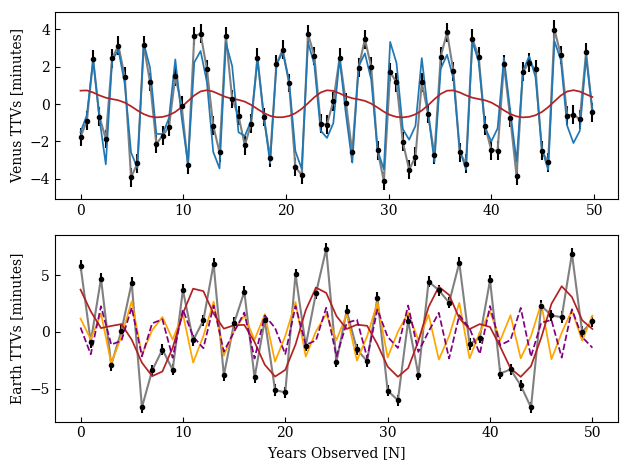

In [78]:
@load ("OUTPUTS/moon_fitmtry3params.jld2")
@load ("mcmc_mtry3results.jld2") 
plot_ttvs(true)
# savefig("IMAGES/bestmoonfit.eps")

In [21]:
tmax = vec(par_mcmc[:,iburn:nsteps,16]).^2 + vec(par_mcmc[:,iburn:nsteps,17]).^2

408750-element Array{Float64,1}:
 2.4321915648287426e-6
 3.5253133347926943e-6
 2.570409361817106e-6 
 3.2141077588567012e-6
 3.138896440425795e-6 
 3.222772438455975e-6 
 2.370307208182521e-6 
 2.855564748475889e-6 
 2.834383207717035e-6 
 2.868388959285808e-6 
 2.6738642809327395e-6
 2.8491641949336146e-6
 2.4227290364979245e-6
 ⋮                    
 3.2772220064884294e-6
 2.4655095493435114e-6
 2.7175655626022763e-6
 2.7747815692023406e-6
 3.0177320815475845e-6
 2.506967809648892e-6 
 2.4573474714835043e-6
 3.645313110001913e-6 
 2.492367195433044e-6 
 2.3427374288310573e-6
 2.7178026087280072e-6
 3.195993028003299e-6 

In [235]:
include("plot_likelihood.jl")

plot_likelihood (generic function with 2 methods)

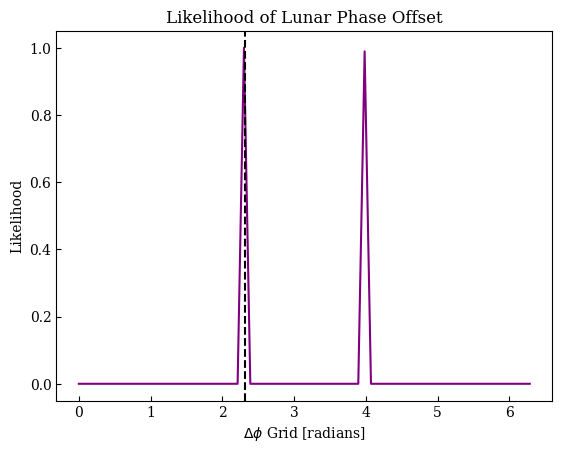

In [238]:
plot_likelihood(true)
axvline(param[18],linestyle="--",color="black")
title("Likelihood of Lunar Phase Offset")
savefig("exomoon.eps")

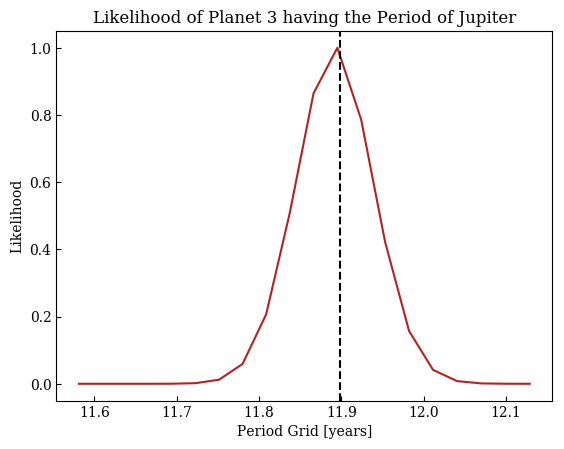

In [234]:
@load("OUTPUTS/p3_fittestparams.jld2")
plot_likelihood(false)
axvline(param[12]/365.25,linestyle="--",color="black")
PyPlot.title("Likelihood of Planet 3 having the Period of Jupiter")
savefig("planet3.eps")

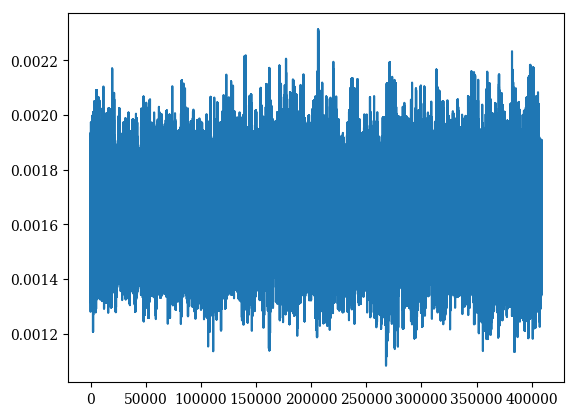

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x170b79588>

In [218]:
@load ("mcmc_mtry3results.jld2")
@load ("OUTPUTS/moon_fitmtry3params.jld2")
tmax = sqrt.(vec(par_mcmc[:,iburn:nsteps,16].^2) + vec(par_mcmc[:,iburn:nsteps,17].^2))
mu2,P2,t02,ecos2,esin2 = pbest_global[6:10]
n1,n2,n3 = ntrans
ttsim2 = (ttmodel[n1+1:n1+n2].-t02)./365.25 

plot(tmax)
PyPlot.title("Amplitude of TTVs")
ylabel("L $t_{max}$")
xlabel("")
tick_params(direction="in")


In [222]:
length(tmax)

408750

In [223]:
length(ttsim2)

51

In [82]:
pname = ["mu_1","P_1","t01","e1 cos(om1)","e1 sin(om1)",
            "mu_2","P_2","t02","e2 cos(om2)","e2 sin(om2)",
            "mu_3","P_3","t03","e3 cos(om3)","e3 sin(om3)",
            "tmax sin(phi0)","tmax cos(phi0)","deltaphi"]

18-element Array{String,1}:
 "mu_1"          
 "P_1"           
 "t01"           
 "e1 cos(om1)"   
 "e1 sin(om1)"   
 "mu_2"          
 "P_2"           
 "t02"           
 "e2 cos(om2)"   
 "e2 sin(om2)"   
 "mu_3"          
 "P_3"           
 "t03"           
 "e3 cos(om3)"   
 "e3 sin(om3)"   
 "tmax sin(phi0)"
 "tmax cos(phi0)"
 "deltaphi"      

In [233]:
function vectorize_data(include_moon::Bool=false)
    names = ["mu", "P", "t0", "e cos(om)", "e sin(om)"]
    planet = ["venus", "earth", "jupiter"]
    nparam = length(param)*nplanet+1
    state_total = zeros((nsteps-iburn)*nwalkers+50,nparam-1)
    for iparam=1:nparam-1
    state_total[:,iparam] += vec(par_mcmc[:,iburn:nsteps,iparam])
    if iparam < nparam
            pname = string(planet[div(iparam-1,5)+1]," ",names[mod(iparam-1,5)+1])
    end
    #     println("index: ",iparam, " ",pname," : ",pbest_global[iparam])
    end
end
# mu1,P1,t01,ecos1,esin1 = pbest_global[1:5]
# mu2,P2,t02,ecos2,esin2 = pbest_global[6:10]
# mu3,P3,t03,ecos3,esin3 = pbest_global[11:15]
# scatter(vec(par_mcmc[1:nwalkers,1:nsteps,1]),vec(par_mcmc[1:nwalkers,1:nsteps,5]))

In [92]:
# label = ["mtry1","mtry2","mtry3","mtry4","mtry5","mtry6","mtry7"]
# sigma = [10.0, 15.0, 30.0, 45.0, 60.0, 120.0, 240.0]
nsteps = 10000
nwalkers = 50

label = "mtry1"
@load ("OUTPUTS/moon_fitmtry1params.jld2")
@time lprob_mcmc,par_mcmc = MCMC(pbest_global,label,nsteps,nwalkers,nplanet,ntrans,tt0,tt,sigtt,false,true)

Step: 525 Walker: 42 Trial Log Prob: 973.494813840564 Prob: 2.568990713253006e-10 Frac: 0.34421919061047174
Step: 924 Walker: 48 Trial Log Prob: 1010.2559661821546 Prob: 0.002797002968573769 Frac: 0.32858565305857396
Step: 942 Walker: 2 Trial Log Prob: 1002.3745194190715 Prob: 0.8057715723782606 Frac: 0.3281050752359092
Number of steps: 1000 Acceptance Rate: 0.32614
Step: 1021 Walker: 18 Trial Log Prob: 986.2861542723255 Prob: 0.002733920498213466 Frac: 0.2868369351669941
Step: 1066 Walker: 15 Trial Log Prob: 1009.2869361157493 Prob: 0.01119757799363932 Frac: 0.3108728943338438
Step: 1156 Walker: 43 Trial Log Prob: 992.8788143635555 Prob: 0.09791433182338034 Frac: 0.31233157962273833
Step: 1356 Walker: 6 Trial Log Prob: 1006.8939136991604 Prob: 1.2447279937953493 Frac: 0.30417886911466546
Step: 1512 Walker: 17 Trial Log Prob: 994.569746819571 Prob: 0.022658884153292494 Frac: 0.303438025579849
Step: 1595 Walker: 27 Trial Log Prob: 1010.0917585772046 Prob: 0.2258786206436136 Frac: 0.3015

([-58.1576 -58.1576 … 1006.41 1006.41; -485.283 -485.283 … 1005.01 1005.01; … ; -1300.35 110.601 … 1005.12 1005.12; -337.598 45.3928 … 1007.7 1007.7], [2.47354e-6 2.47354e-6 … 2.53309e-6 2.53309e-6; 2.50265e-6 2.50265e-6 … 2.35469e-6 2.35469e-6; … ; 2.5474e-6 2.54053e-6 … 2.49603e-6 2.49603e-6; 2.49661e-6 2.44118e-6 … 2.40483e-6 2.40483e-6]

[224.701 224.701 … 224.701 224.701; 224.701 224.701 … 224.701 224.701; … ; 224.701 224.701 … 224.701 224.701; 224.701 224.701 … 224.701 224.701]

[2.4335e6 2.4335e6 … 2.4335e6 2.4335e6; 2.4335e6 2.4335e6 … 2.4335e6 2.4335e6; … ; 2.4335e6 2.4335e6 … 2.4335e6 2.4335e6; 2.4335e6 2.4335e6 … 2.4335e6 2.4335e6]

...

[-0.00167004 -0.00167004 … -0.0016589 -0.0016589; -0.0016599 -0.0016599 … -0.00169674 -0.00169674; … ; -0.00175706 -0.00173045 … -0.00163256 -0.00163256; -0.00159909 -0.00160989 … -0.00172841 -0.00172841]

[2.31393 2.31393 … 2.30998 2.30998; 2.31393 2.31393 … 2.3139 2.3139; … ; 2.31395 2.31395 … 2.3098 2.3098; 2.31395 2.31395 … 2.31476 2.314

In [2]:
nsteps = 10000
nwalkers = 50
label = "mtry2"
@load ("OUTPUTS/moon_fitmtry2params.jld2")
@time lprob_mcmc,par_mcmc = MCMC(pbest_global,label,nsteps,nwalkers,nplanet,ntrans,tt0,tt,sigtt,false,true)

InterruptException: InterruptException:

In [5]:
nsteps = 10000
nwalkers = 50
label = "mtry3"
@load ("OUTPUTS/moon_fitmtry3params.jld2")
@time lprob_mcmc,par_mcmc = MCMC(pbest_global,label,nsteps,nwalkers,nplanet,ntrans,tt0,tt,sigtt,false,true)

Step: 138 Walker: 19 Trial Log Prob: 960.10335433473 Prob: 1.7799501268653257 Frac: 0.3380404716843791
Step: 221 Walker: 40 Trial Log Prob: 919.9860791678276 Prob: 5.545294488847325e-13 Frac: 0.327445652173913
Step: 380 Walker: 21 Trial Log Prob: 968.479445993391 Prob: 4.076118408502729e-5 Frac: 0.32386273786305414
Step: 516 Walker: 14 Trial Log Prob: 967.731223731974 Prob: 0.41675690178693664 Frac: 0.32130104021114736
Step: 527 Walker: 15 Trial Log Prob: 970.068023260411 Prob: 0.02733703968187506 Frac: 0.32069162074862245
Step: 636 Walker: 44 Trial Log Prob: 970.4509740517562 Prob: 0.0001394617536705741 Frac: 0.3186135748883437
Step: 663 Walker: 43 Trial Log Prob: 954.6758009728218 Prob: 0.002464238641340629 Frac: 0.3178951814862867
Number of steps: 1000 Acceptance Rate: 0.31088
Step: 1255 Walker: 50 Trial Log Prob: 957.6307623959626 Prob: 0.3175991651506316 Frac: 0.29011764705882354
Step: 1406 Walker: 19 Trial Log Prob: 969.1025758600487 Prob: 0.12587484773905844 Frac: 0.288322068182

([536.9582995895746 536.9582995895746 … 965.5180541223333 965.5180541223333; 581.0062564545267 585.2412554050761 … 961.6507482336331 961.6507482336331; … ; 301.1920985816966 388.3370429892962 … 964.1500891091829 967.1402611752344; 156.22104983777143 354.20181050778115 … 963.7249122367361 963.7249122367361], [2.4820385666133963e-6 2.4820385666133963e-6 … 2.3463228512595104e-6 2.3463228512595104e-6; 2.3911494609844447e-6 2.390721754815025e-6 … 2.2381839740953316e-6 2.2381839740953316e-6; … ; 2.5400715349226932e-6 2.5265021189756402e-6 … 2.3956758211848595e-6 2.3585057178070333e-6; 2.4202229624146707e-6 2.460164078497137e-6 … 2.095995375139774e-6 2.095995375139774e-6]

[224.700771846633 224.700771846633 … 224.70077354314589 224.70077354314589; 224.70077436660793 224.70077431695245 … 224.700769733294 224.700769733294; … ; 224.70075209489139 224.70075567544887 … 224.70076947405596 224.70076977210272; 224.70078371929623 224.70078359215694 … 224.7007741477108 224.7007741477108]

[2.4335037687

In [ ]:
nsteps = 10000
nwalkers = 50
label = "mtry4"
@load ("OUTPUTS/moon_fitmtry4params.jld2")
@time lprob_mcmc,par_mcmc = MCMC(pbest_global,label,nsteps,nwalkers,nplanet,ntrans,tt0,tt,sigtt,false,true)

In [16]:
nsteps = 10000
nwalkers = 50
label = "mtry5"
@load ("OUTPUTS/moon_fitmtry5params.jld2")
@time lprob_mcmc,par_mcmc = MCMC(pbest_global,label,nsteps,nwalkers,nplanet,ntrans,tt0,tt,sigtt,false,true)

InterruptException: InterruptException:

In [ ]:
nsteps = 10000
nwalkers = 50
label = "mtry6"
@load ("OUTPUTS/moon_fitmtry6params.jld2")
@time lprob_mcmc,par_mcmc = MCMC(pbest_global,label,nsteps,nwalkers,nplanet,ntrans,tt0,tt,sigtt,false,true)

In [ ]:
nsteps = 10000
nwalkers = 50
label = "mtry7"
@load ("OUTPUTS/moon_fitmtry7params.jld2")
@time lprob_mcmc,par_mcmc = MCMC(pbest_global,label,nsteps,nwalkers,nplanet,ntrans,tt0,tt,sigtt,false,true)

## MCMC Diagnostics

In [3]:
@load("mcmc_mtry1results.jld2")

8-element Array{Symbol,1}:
 :par_mcmc    
 :lprob_mcmc  
 :param       
 :nwalkers    
 :nsteps      
 :accept      
 :iburn       
 :indepsamples

In [11]:
nparam = 18  
samplesize = zeros(nparam)
for j=1:nwalkers
for i=1:nparam
  samplesize[i] += effective_sample_size(par_mcmc[j,:,i])
end
end
indepsamples = minimum(samplesize)
#   println("Independent Sample Size: ",indepsamples)


1600.6485560900187

## MCMC steps and parameters

In [205]:
using Statistics,Distributions,StatsBase
@load ("mcmc_mtry3results.jld2")
@load ("OUTPUTS/moon_fitmtry3params.jld2")

17-element Array{Symbol,1}:
 :pbest_dp    
 :lprob_dp    
 :lprob_best  
 :pbest_global
 :ntrans      
 :nplanet     
 :tt0         
 :tt          
 :ttmodel     
 :sigtt       
 :p3in        
 :p3out       
 :np3         
 :nphase      
 :dpin        
 :dpout       
 :ndp         

In [176]:
xvalue = vec(par_mcmc[:,iburn:nsteps,1]).* CGS.MSUN/CGS.MEARTH
yvalue = vec(par_mcmc[:,iburn:nsteps,6]).*CGS.MSUN/CGS.MEARTH
truex = param[1].* CGS.MSUN/CGS.MEARTH
truey = param[6].* CGS.MSUN/CGS.MEARTH

0.9972419067609782

In [164]:
samples = [xvalue, yvalue]
bins = [xbins, ybins]
varnames = [L"Mass of Earth [$M_{\oplus}$]", L"Mass of Earth [$M_{\oplus}$]"]
nsamps = length(samples[1])
dens_norm = xvalue
dens_mean = mean(xvalue)
dens_std = std(xvalue)
dens_avg = 0.0
for isamp=1:nsamps
    dens_avg += mean(dens_norm[isamp])
end
dens_var = 0.0
for isamp=1:nsamps
   dens_var += (mean(dens_norm[isamp]) - dens_avg)^2
end


In [165]:
dens_avg= dens_avg/nsamps
dens_sig_avg = sqrt(dens_var/nsamps)


327399.0470535731

In [157]:
using Distributions
function t_test(x; conf_level=0.683)
    alpha = (1 - conf_level)
    tstar = quantile(TDist(length(x)-1), 1 - alpha/2)
    SE = std(x)/sqrt(length(x))

    lo = truex - 1 * tstar * SE
    hi = truex + 1 * tstar * SE
    return lo,hi
#     "($lo, $hi)"[-1: 1]
end

t_test (generic function with 1 method)

0.03549767886676856

In [177]:
fit(Normal,xvalue)

Normal{Float64}(μ=0.800978221484468, σ=0.08937918262191964)

In [180]:
0.800978221484468 - 0.08937918262191964

0.7115990388625483

In [182]:
plot()

0.7115989295300056

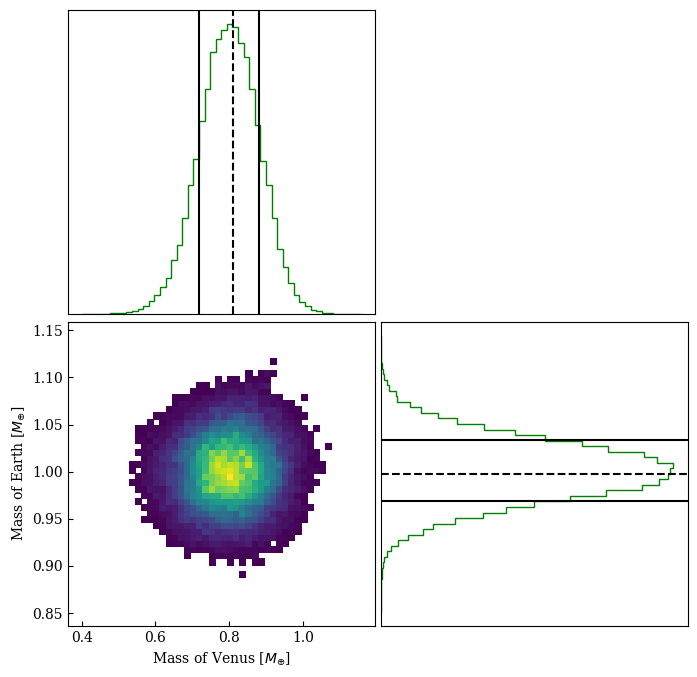

In [190]:
# function plot_posterior(samples,bins,range)
# xvalue, yvalue = samples
xvalue = vec(par_mcmc[:,iburn:nsteps,1]).* CGS.MSUN/CGS.MEARTH
yvalue = vec(par_mcmc[:,iburn:nsteps,6]).*CGS.MSUN/CGS.MEARTH
truex = param[1].* CGS.MSUN/CGS.MEARTH
truey = param[6].* CGS.MSUN/CGS.MEARTH
meanx=mean(xvalue);sigmax=std(xvalue)
meany=mean(yvalue);sigmay=std(yvalue)
xbins=50
ybins=50
nbins=50
fig=figure(figsize=(8,8))
subplots_adjust(hspace=0.025,wspace=0.02)
subplot(221)
ax1=gca()
ax1.yaxis.set_visible(false)
ax1.xaxis.set_visible(false)
h1=plt.hist(xvalue,bins=xbins,histtype="step",density="true",color="green") 
axvline(truex,linestyle="--",color="black")
axvline(meanx-sigmax,color="black")
axvline(meanx+sigmax,color="black")
subplot(223)
ax2=gca()
tick_params(direction="in")
plt.hist2d(xvalue,yvalue,bins=nbins,normed=true,cmin=1)
ax2.set_ylabel(L"Mass of Earth [$M_{\oplus}$]")
ax2.set_xlabel(L"Mass of Venus [$M_{\oplus}$]")
subplot(224)
ax3=gca()
ax3.xaxis.set_visible(false)
ax3.yaxis.set_visible(false)
h2=plt.hist(yvalue,bins=ybins,histtype="step",density="true",color="green",orientation="horizontal")
axhline(truey,linestyle="--",color="black")
axhline(meany-sigmay,color="black")
axhline(meany+sigmay,color="black")
# savefig("masses.eps")
# tight_layout()

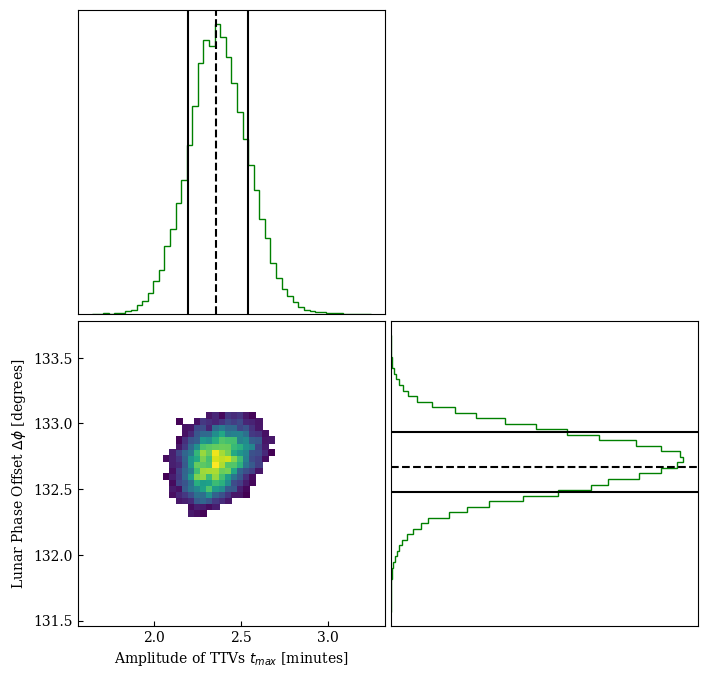

In [243]:
# function plot_posterior(samples,bins,range)
xvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,16].^2) + vec(par_mcmc[:,iburn:nsteps,17].^2)).* (24 * 60)
yvalue = vec(par_mcmc[:,iburn:nsteps,18]).* 57.2957795 
truex = sqrt(param[16]^2 + param[17]^2).* (24 * 60)
truey = param[18].* 57.2957795 
# xvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,4]).^2 + vec(par_mcmc[:,iburn:nsteps,5]).^2)
# yvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,9]).^2 + vec(par_mcmc[:,iburn:nsteps,10]).^2)
# truex = sqrt(param[4]^2 + param[5]^2)
# truey = sqrt(param[9]^2 + param[10]^2)
meanx=mean(xvalue);sigmax=std(xvalue)
meany=mean(yvalue);sigmay=std(yvalue)
xbins=50
ybins=50
nbins=50
fig=figure(figsize=(8,8))
subplots_adjust(hspace=0.025,wspace=0.02)
subplot(221)
ax1=gca()
ax1.yaxis.set_visible(false)
ax1.xaxis.set_visible(false)
h1=plt.hist(xvalue,bins=xbins,histtype="step",density="true",color="green") 
axvline(truex,linestyle="--",color="black")
axvline(meanx-sigmax,color="black")
axvline(meanx+sigmax,color="black")
subplot(223)
ax2=gca()
tick_params(direction="in")
plt.hist2d(xvalue,yvalue,bins=nbins,normed=true,cmin=1)
# plot(truex,truey,ms=5)
ax2.set_xlabel(L"Amplitude of TTVs $t_{max}$ [minutes]")
ax2.set_ylabel(L"Lunar Phase Offset $\Delta \phi$ [degrees]")
subplot(224)
ax3=gca()
ax3.xaxis.set_visible(false)
ax3.yaxis.set_visible(false)
h2=plt.hist(yvalue,bins=ybins,histtype="step",density="true",color="green",orientation="horizontal")
axhline(truey,linestyle="--",color="black")
axhline(meany-sigmay,color="black")
axhline(meany+sigmay,color="black")
savefig("tmaxvsdeltaphi.eps")
# tight_layout()

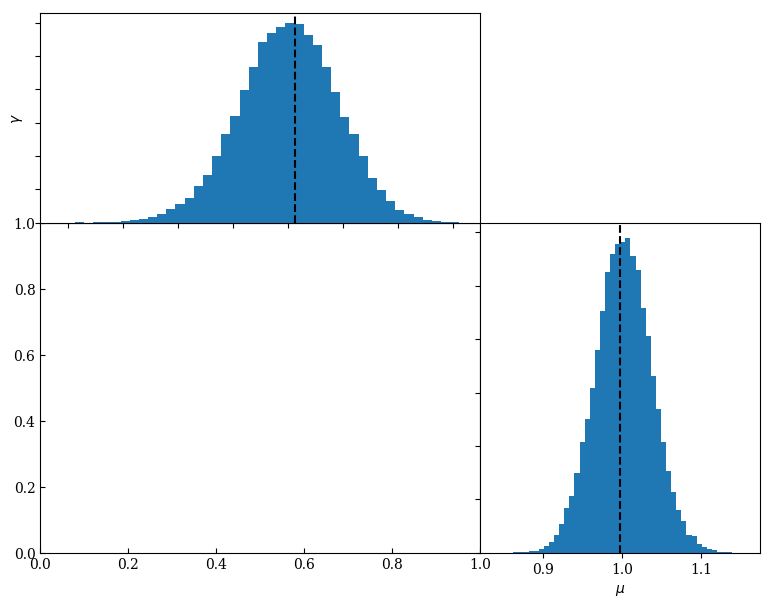

PyObject <matplotlib.lines.Line2D object at 0x14c6a1470>

In [29]:

function plot_params() 
    nbins=50
    fig = figure(figsize=(8,6))
#     subplots_adjust(hspace=0.0)
#     subplot(221)
#     subplot(223)
    ax1 = fig.add_axes((0.1, 0.1, 0.55, 0.55))
    ax1.tick_params(direction="in")
#     ax1.xaxis.set_major_formatter(plt.NullFormatter())
#     ax1.yaxis.set_major_formatter(plt.NullFormatter())
    ax2 = fig.add_axes((0.1, 0.65, 0.55, 0.35))
    ax2.xaxis.set_major_formatter(plt.NullFormatter())
    ax2.yaxis.set_major_formatter(plt.NullFormatter())
    ax2.set_xlim(0.35,1.15)
    ax2.set_ylabel(L"$\gamma$")
    h1 = plt.hist(xvalue,nbins) 
    axvline(truex,linestyle="--",color="black")
#     ax1.set_position(new_position) # Position Method 2: Change the size and position of the axis
#     setp(ax1.get_xticklabels(),visible=false)
#     plt.hist(xvalue)
#     subplot(224,sharex=ax2)
    ax3 = fig.add_axes((0.65, 0.1, 0.35, 0.55))
#     setp(ax3.get_yticklabels(),visible=false)
    ax3.yaxis.set_major_formatter(plt.NullFormatter())
#     ax3.yaxis.set_visible(false)
    ax3.set_xlabel(L"$\mu$")
    h2 = plt.hist(yvalue,nbins)
    axvline(truey,linestyle="--",color="black")
end
plot_params()